<a href="https://colab.research.google.com/github/ChideraFrancisca/News_articles_analysis/blob/main/news_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('news_articles.csv')
df.head()


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
df.shape

(2096, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [ ]:
df.describe()

,hasImage
count,2095.000000
mean,0.777088
std,0.416299
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df.isnull().sum()

,0
author,0
published,0
title,0
text,46
language,1
site_url,1
main_img_url,1
type,1
label,1
title_without_stopwords,2


In [ ]:
df.duplicated().sum()

10

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2086 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2086 non-null   object 
 1   published                2086 non-null   object 
 2   title                    2086 non-null   object 
 3   text                     2040 non-null   object 
 4   language                 2085 non-null   object 
 5   site_url                 2085 non-null   object 
 6   main_img_url             2085 non-null   object 
 7   type                     2085 non-null   object 
 8   label                    2085 non-null   object 
 9   title_without_stopwords  2084 non-null   object 
 10  text_without_stopwords   2036 non-null   object 
 11  hasImage                 2085 non-null   float64
dtypes: float64(1), object(11)
memory usage: 211.9+ KB


In [ ]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print(df[col].value_counts())
    print("\n")

Unique values in column 'author':
['Barracuda Brigade' 'reasoning with facts' 'Fed Up' 'EdJenner'
 'No Author' 'Shawn Helton' 'Mike Rivero' 'Branko Mali' 'Jimmy Rustling'
 'tokyowashi (noreply@blogger.com)' 'Anonymous' 'pak alresky'
 'Steve smith' 'David Howard' 'Joseph Olson' 'neoholographic' 'Peeple'
 'PraetorianAZ' 'seentoomuch' 'vlawde' 'apoc36' 'theantediluvian' 'reldra'
 'Kali74' 'recrisp' 'Profusion' 'sanitizedinfo' 'The angel of light'
 'darkbake' 'willz' 'jedi_hamster' 'PrairieShepherd' 'SyxPak' 'matafuchs'
 'Bloodydagger' 'Xcathdra' 'gortex' 'ssenerawa' 'Encryptor' 'bryan2006'
 'ghostrager' 'frenchfries' 'Paradoxroutine' 'SoulOfCeres' 'gariac'
 'xuenchen' 'Hefficide' 'childoffather' 'Gandalf77' 'Kantzveldt' 'greg302'
 'WindCharger' 'crazyewok' 'TrueBrit' 'beeeyotch' 'Zaphod58'
 'CriticalStinker' 'Violater1' 'carewemust' 'DaRAGE' 'mobiusmale'
 'Brandon Turbeville' 'Activist Post' 'ActivistPost'
 'Day of the Dead 2015: History, food and reflections \x96 Andrea Lawson Gray'
 'Iv

In [ ]:
unique_values = {}
for col in df.columns:
    unique_values[col] =df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
author,491
published,2006
title,1784
text,1941
language,5
site_url,68
main_img_url,1229
type,8
label,2
title_without_stopwords,1780


label
Fake    1284
Real     801
Name: count, dtype: int64


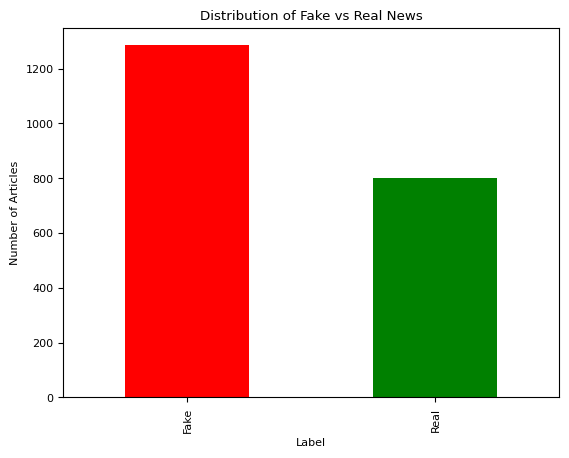

In [ ]:
# Distribution of fake vs real news
print(df['label'].value_counts())


df['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Fake vs Real News')
plt.xlabel('Label')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
language_distribution = df['language'].value_counts()

print(language_distribution)

language
english    2007
german       72
ignore        3
french        2
spanish       1
Name: count, dtype: int64


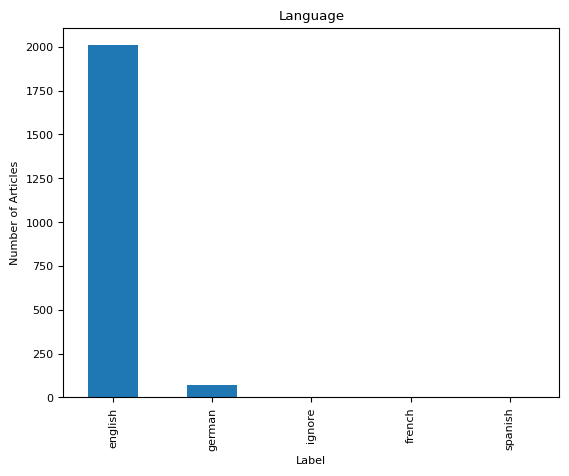

In [ ]:
df['language'].value_counts().plot(kind='bar')
plt.title('Language')
plt.xlabel('Label')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
df['author'].unique()
print(df['author'])

0          Barracuda Brigade
1       reasoning with facts
2          Barracuda Brigade
3                     Fed Up
4                     Fed Up
                ...         
2091             -NO AUTHOR-
2092             -NO AUTHOR-
2093             -NO AUTHOR-
2094             -NO AUTHOR-
2095             Eddy Lavine
Name: author, Length: 2086, dtype: object


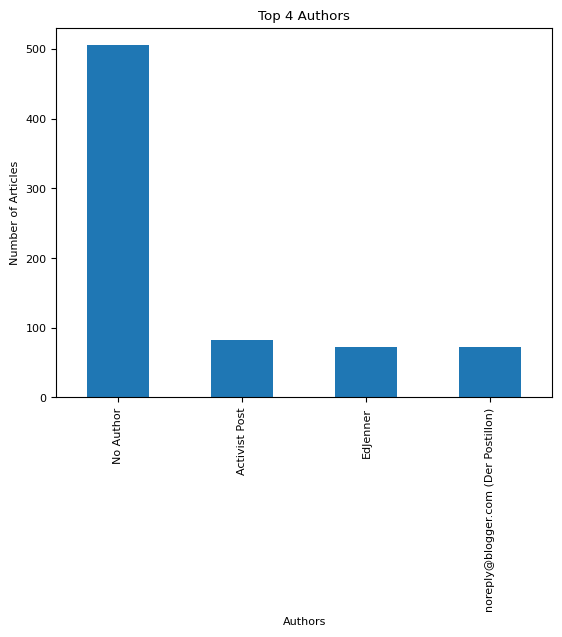

In [ ]:
import matplotlib.pyplot as plt

# Get the top 5 authors
top_5_authors = df['author'].value_counts().head(4)

# Plot the bar chart
top_5_authors.plot(kind='bar')

# Update font size
plt.rcParams.update({'font.size': 8})

# Add title and labels
plt.title('Top 4 Authors')
plt.xlabel('Authors')
plt.ylabel('Number of Articles')

# Display the plot
plt.show()


**COMMENTS**

*   The dataset contains 286 news articles.
*   The dataset showed 64 article authors with activipost being the author with the highest number of articles.


* The articles were mostly wrtitten in english language.  
* 251 of the articles were fakenews while 35 were real.



